In [345]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [346]:
df = pd.read_excel("fire.xlsx")
df

,Date,Rainfall (mm),T-MAX (°C),T-MIN (°C),Cloud Cover,Rh Max (%),Rh Min (%),Wind speed (kmph),Wind Direction (deg),Fire/No Fire,Spread (0.5 hr),Spread (1 hr),Spread (2 hr)
0,2024-02-03 00:00:00,0,32,18,0,62,29,6,205,No Fire,0.0,0.0,0.0
1,2024-02-04 00:00:00,0,33,17,0,62,22,6,205,No Fire,0.0,0.0,0.0
2,2024-02-05 00:00:00,2,44,26,1,42,15,13,238,No Fire,0.0,0.0,0.0
3,2024-02-05 00:00:00,0,32,16,0,62,19,6,158,No Fire,0.0,0.0,0.0
4,2024-02-06 00:00:00,0,32,15,0,77,22,7,180,No Fire,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,2025-11-06 00:00:00,20,35,23,7,73,37,3,187,No Fire,0.0,0.0,0.0
202,2025-11-06 00:00:00,3,36,27,5,50,17,8,238,No Fire,0.0,0.0,0.0
203,2025-12-03 00:00:00,0,36,19,0,48,10,6,177,No Fire,0.0,0.0,0.0
204,2025-12-04 00:00:00,0,39,25,3,54,14,5,192,No Fire,0.0,0.0,0.0


In [347]:
df.isnull().sum()

Date                    0
Rainfall (mm)           0
T-MAX (°C)              0
T-MIN (°C)              0
Cloud Cover             0
Rh Max (%)              0
Rh Min (%)              0
Wind speed (kmph)       0
Wind Direction (deg)    0
Fire/No Fire            0
Spread (0.5 hr)         0
Spread (1 hr)           0
Spread (2 hr)           0
dtype: int64

In [348]:
df['Fire/No Fire'] = df['Fire/No Fire'].apply(lambda x: 1 if x == 'Fire' else 0)


In [349]:
df

,Date,Rainfall (mm),T-MAX (°C),T-MIN (°C),Cloud Cover,Rh Max (%),Rh Min (%),Wind speed (kmph),Wind Direction (deg),Fire/No Fire,Spread (0.5 hr),Spread (1 hr),Spread (2 hr)
0,2024-02-03 00:00:00,0,32,18,0,62,29,6,205,0,0.0,0.0,0.0
1,2024-02-04 00:00:00,0,33,17,0,62,22,6,205,0,0.0,0.0,0.0
2,2024-02-05 00:00:00,2,44,26,1,42,15,13,238,0,0.0,0.0,0.0
3,2024-02-05 00:00:00,0,32,16,0,62,19,6,158,0,0.0,0.0,0.0
4,2024-02-06 00:00:00,0,32,15,0,77,22,7,180,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,2025-11-06 00:00:00,20,35,23,7,73,37,3,187,0,0.0,0.0,0.0
202,2025-11-06 00:00:00,3,36,27,5,50,17,8,238,0,0.0,0.0,0.0
203,2025-12-03 00:00:00,0,36,19,0,48,10,6,177,0,0.0,0.0,0.0
204,2025-12-04 00:00:00,0,39,25,3,54,14,5,192,0,0.0,0.0,0.0


In [350]:
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)

                      Rainfall (mm)  T-MAX (°C)  T-MIN (°C)  Cloud Cover  \
Rainfall (mm)              1.000000   -0.353062    0.053751     0.660379   
T-MAX (°C)                -0.353062    1.000000    0.666655    -0.142591   
T-MIN (°C)                 0.053751    0.666655    1.000000     0.389852   
Cloud Cover                0.660379   -0.142591    0.389852     1.000000   
Rh Max (%)                 0.465894   -0.432147   -0.166132     0.290721   
Rh Min (%)                 0.657847   -0.368362    0.134510     0.642601   
Wind speed (kmph)          0.207515    0.209954    0.426674     0.479797   
Wind Direction (deg)       0.188599    0.259485    0.510817     0.359062   
Fire/No Fire              -0.063787    0.259222    0.105156    -0.150598   
Spread (0.5 hr)           -0.061123    0.290756    0.118594    -0.146423   
Spread (1 hr)             -0.061123    0.290756    0.118594    -0.146423   
Spread (2 hr)             -0.061123    0.290756    0.118594    -0.146423   

           

In [351]:
spread_cols = ['Spread (0.5 hr)', 'Spread (1 hr)', 'Spread (2 hr)'] 
df_fire_only = df[df['Fire/No Fire'] == 1]

In [352]:
X = df.drop(['Fire/No Fire', 'Date'] + spread_cols, axis=1)


In [353]:
y=df['Fire/No Fire']

In [354]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [355]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((164, 8), (42, 8), (164,), (42,))

In [356]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [357]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score, recall_score, f1_score, roc_auc_score

In [358]:
models={
    "Decision Tree":DecisionTreeClassifier(class_weight="balanced"),
    "Random Forest":RandomForestClassifier(class_weight="balanced"),
    "Adaboost" :AdaBoostClassifier(),
  ##"Gradient Boost":GradientBoostingClassifier(),
    "XGB":XGBClassifier()
}
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train, y_train)
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    ## training test
    model_train_accuracy=accuracy_score(y_train, y_train_pred)
    model_train_f1=f1_score(y_train, y_train_pred,average="weighted")
    model_train_precision=precision_score(y_train, y_train_pred)
    model_train_recall=recall_score(y_train, y_train_pred)
    model_train_roc_auc=roc_auc_score(y_train, y_train_pred)
    ##test performance
    model_test_accuracy=accuracy_score(y_test, y_test_pred)
    model_test_f1=f1_score(y_test, y_test_pred,average="weighted")
    model_test_precision=precision_score(y_test, y_test_pred)
    model_test_recall=recall_score(y_test, y_test_pred)
    model_test_roc_auc=roc_auc_score(y_test, y_test_pred)
    print(list(models.keys())[i])
    print ("Model performance for training set data")
    print ("Accuracy: ", model_train_accuracy)
    print ("F1 Score: ", model_train_f1)
    print ("Precision: ", model_train_precision)
    print ("Recall: ", model_train_recall)
    print ("ROC AUC: ", model_train_roc_auc)
    print("---------------------------------------")
    print ("Model performance for test set data")
    print ("Accuracy: ", model_test_accuracy)
    print ("F1 Score: ", model_test_f1)
    print ("Precision: ", model_test_precision)
    print ("Recall: ", model_test_recall)
    print ("ROC AUC: ", model_test_roc_auc)
    print("---------------------------------------")

c:\Users\Lenovo\Desktop\forest fire\venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


Decision Tree
Model performance for training set data
Accuracy:  0.9939024390243902
F1 Score:  0.99412728193216
Precision:  0.8571428571428571
Recall:  1.0
ROC AUC:  0.9968354430379747
---------------------------------------
Model performance for test set data
Accuracy:  0.9523809523809523
F1 Score:  0.9291521486643438
Precision:  0.0
Recall:  0.0
ROC AUC:  0.5
---------------------------------------


c:\Users\Lenovo\Desktop\forest fire\venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


Random Forest
Model performance for training set data
Accuracy:  0.9939024390243902
F1 Score:  0.99412728193216
Precision:  0.8571428571428571
Recall:  1.0
ROC AUC:  0.9968354430379747
---------------------------------------
Model performance for test set data
Accuracy:  0.9523809523809523
F1 Score:  0.9291521486643438
Precision:  0.0
Recall:  0.0
ROC AUC:  0.5
---------------------------------------
Adaboost
Model performance for training set data
Accuracy:  0.9939024390243902
F1 Score:  0.99412728193216
Precision:  0.8571428571428571
Recall:  1.0
ROC AUC:  0.9968354430379747
---------------------------------------
Model performance for test set data
Accuracy:  0.9761904761904762
F1 Score:  0.9723691945914168
Precision:  1.0
Recall:  0.5
ROC AUC:  0.75
---------------------------------------
XGB
Model performance for training set data
Accuracy:  0.9878048780487805
F1 Score:  0.9866237152937567
Precision:  1.0
Recall:  0.6666666666666666
ROC AUC:  0.8333333333333333
-------------------

c:\Users\Lenovo\Desktop\forest fire\venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [359]:
best_model = models["Random Forest"] 

In [360]:
input_data = pd.DataFrame([{
    'Rainfall (mm)': 1,
    'T-MAX (°C)': 42,
    'T-MIN (°C)': 25,
    'Cloud Cover': 0,
    'Rh Max (%)': 66,
    'Rh Min (%)': 19,
    'Wind speed (kmph)': 6,
    'Wind Direction (deg)': 191
}])

In [361]:
spread_models={}


In [362]:
fire_features = df_fire_only[X.columns]  # drop correct cols
for col in spread_cols:
    reg = RandomForestRegressor()
    reg.fit(scaler.transform(fire_features), df_fire_only[col])
    spread_models[col] = reg

In [370]:
import folium
from folium.plugins import MeasureControl
from geopy.distance import distance as geopy_distance


input_data = pd.DataFrame([{
    'Rainfall (mm)': 4,
    'T-MAX (°C)': 20,
    'T-MIN (°C)': 15,
    'Cloud Cover': 4,
    'Rh Max (%)': 66,
    'Rh Min (%)': 19,
    'Wind speed (kmph)': 6,
    'Wind Direction (deg)': 191,
    'Latitude': 19.9137,      
    'Longitude': 83.1649
}])

# Extract lat/lon
lat = input_data['Latitude'].values[0]
lon = input_data['Longitude'].values[0]

# Drop lat/lon for model input
input_data_model = input_data[X.columns]

# Predict fire
prediction = best_model.predict(input_data_model)[0]

# Scale for spread model
input_scaled = scaler.transform(input_data_model)

if prediction == 1:
    print("Fire predicted")
    print("Predicting spread distances:")

    spread_results = {}
    for col in spread_cols:
        spread_distance = spread_models[col].predict(input_scaled)[0]
        spread_results[col] = spread_distance
        print(f"  {col}: {spread_distance:.2f} km")

    # Create map centered at fire point
    fire_map = folium.Map(location=[lat, lon], zoom_start=12, control_scale=True)
    folium.Marker([lat, lon], popup="🔥 Fire Origin", icon=folium.Icon(color='red')).add_to(fire_map)

    # Add circles for spread distances
    for col, dist in spread_results.items():
        folium.Circle(
            radius=dist * 1000,  # convert km to meters
            location=[lat, lon],
            popup=f"{col}: {dist:.2f} km",
            color='crimson',
            fill=True,
            fill_color='orange',
            fill_opacity=0.3
        ).add_to(fire_map)

    fire_map.add_child(MeasureControl())

    # Display in notebook
    fire_map.save("fire_spread_map.html")
    print("🗺️ Map saved as 'fire_spread_map.html'")
else:
    print("No fire predicted")


No fire predicted


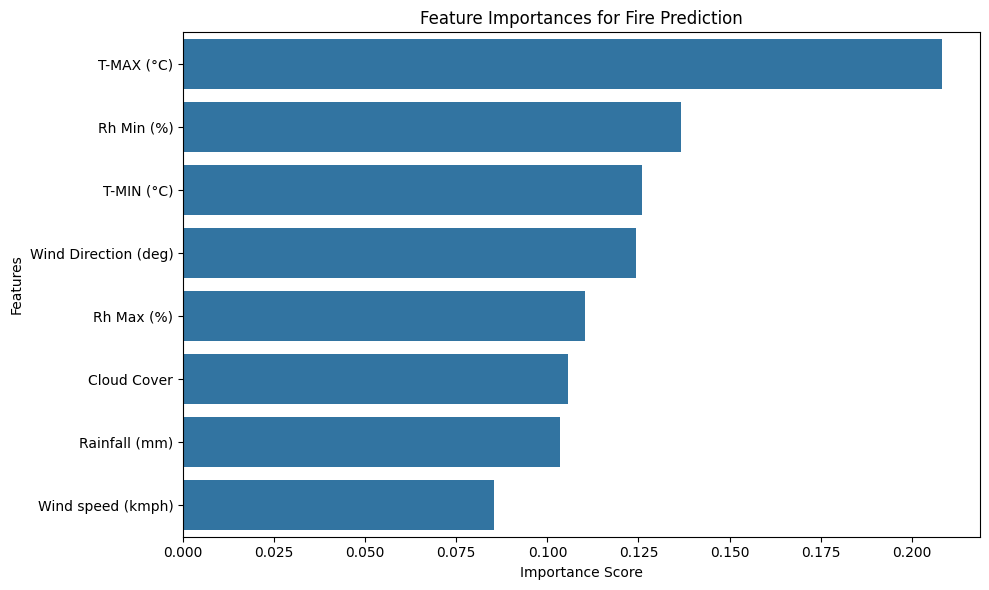

In [366]:

importances = best_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Feature Importances for Fire Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

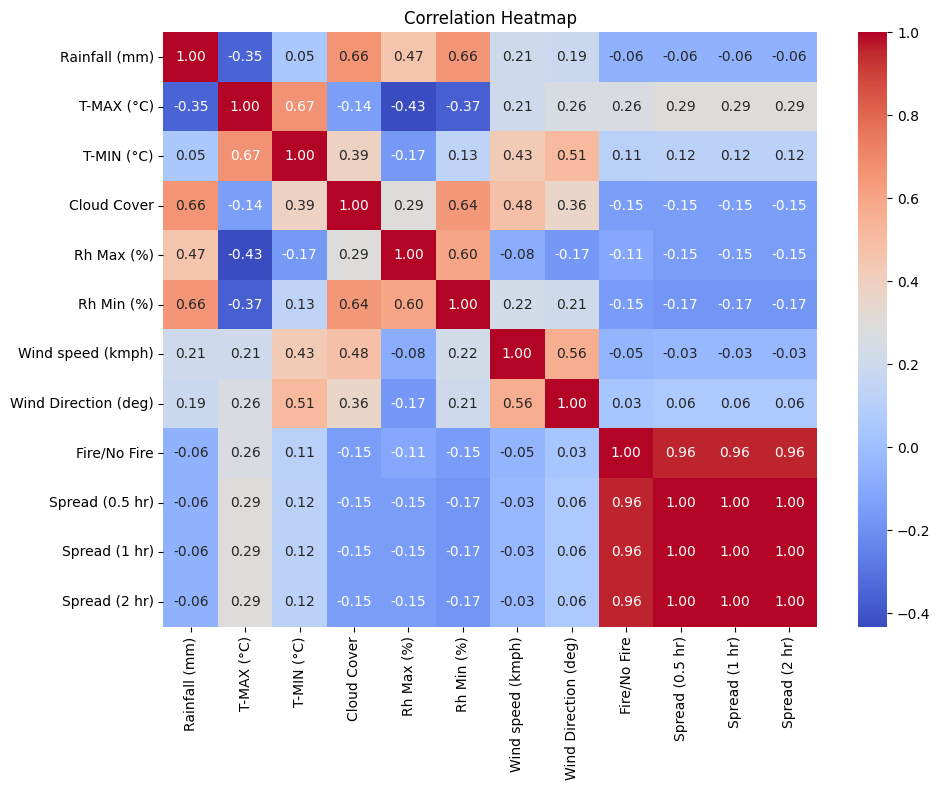

In [367]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


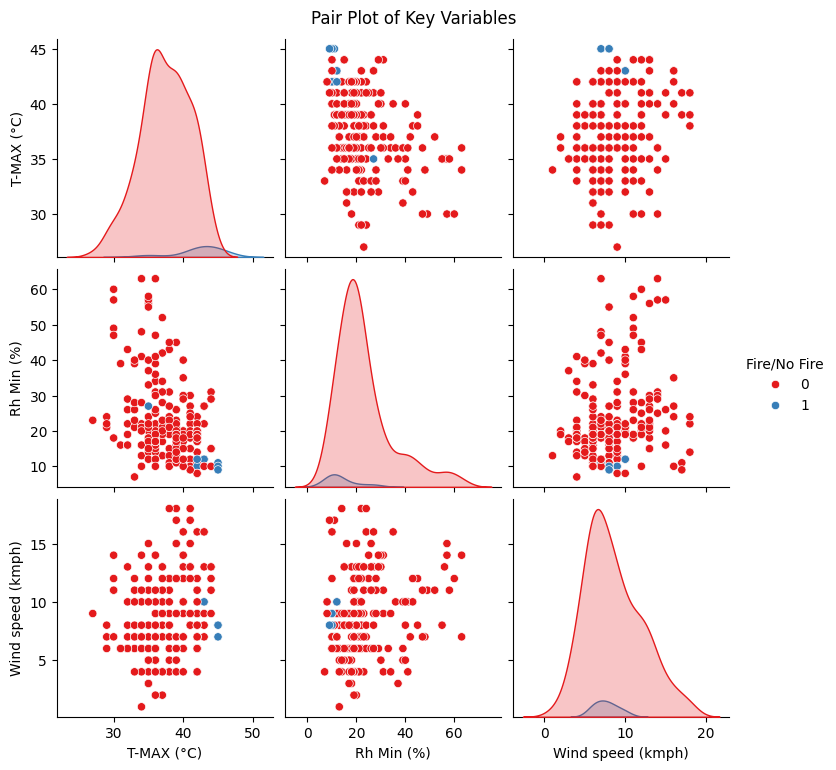

In [369]:
sns.pairplot(df[["T-MAX (°C)", "Rh Min (%)", "Wind speed (kmph)", "Fire/No Fire"]], hue="Fire/No Fire", palette="Set1")
plt.suptitle("Pair Plot of Key Variables", y=1.02)
plt.show()